In [28]:
!ls

annotations		      label.zip				  train2017.zip
annotations_trainval2017.zip  sample_data			  val2017
bbox_txt		      stuff_annotations_trainval2017.zip  val2017.zip
images			      train2017


In [0]:
!wget http://images.cocodataset.org/zips/train2017.zip

--2019-10-26 09:33:04--  http://images.cocodataset.org/zips/train2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.216.146.83
Connecting to images.cocodataset.org (images.cocodataset.org)|52.216.146.83|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19336861798 (18G) [application/zip]
Saving to: ‘train2017.zip’

train2017.zip       100%[===================>]  18.01G  16.4MB/s    in 18m 55s 

2019-10-26 09:51:59 (16.2 MB/s) - ‘train2017.zip’ saved [19336861798/19336861798]



In [0]:
!wget http://images.cocodataset.org/zips/val2017.zip

--2019-10-26 09:52:00--  http://images.cocodataset.org/zips/val2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.216.27.68
Connecting to images.cocodataset.org (images.cocodataset.org)|52.216.27.68|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 815585330 (778M) [application/zip]
Saving to: ‘val2017.zip’

val2017.zip         100%[===================>] 777.80M  16.9MB/s    in 49s     

2019-10-26 09:52:50 (15.9 MB/s) - ‘val2017.zip’ saved [815585330/815585330]



In [0]:
!wget http://images.cocodataset.org/annotations/annotations_trainval2017.zip

--2019-10-26 09:52:52--  http://images.cocodataset.org/annotations/annotations_trainval2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.217.39.100
Connecting to images.cocodataset.org (images.cocodataset.org)|52.217.39.100|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 252907541 (241M) [application/zip]
Saving to: ‘annotations_trainval2017.zip’

annotations_trainva 100%[===================>] 241.19M  16.5MB/s    in 16s     

2019-10-26 09:53:08 (15.2 MB/s) - ‘annotations_trainval2017.zip’ saved [252907541/252907541]



In [0]:
!wget http://images.cocodataset.org/annotations/stuff_annotations_trainval2017.zip

--2019-10-26 09:53:10--  http://images.cocodataset.org/annotations/stuff_annotations_trainval2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.216.237.195
Connecting to images.cocodataset.org (images.cocodataset.org)|52.216.237.195|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1148688564 (1.1G) [application/zip]
Saving to: ‘stuff_annotations_trainval2017.zip’

stuff_annotations_t 100%[===================>]   1.07G  17.0MB/s    in 68s     

2019-10-26 09:54:18 (16.1 MB/s) - ‘stuff_annotations_trainval2017.zip’ saved [1148688564/1148688564]



In [0]:
%%capture
!unzip stuff_annotations_trainval2017.zip

In [0]:
%%capture
!unzip annotations_trainval2017.zip

In [0]:
%%capture
!unzip train2017.zip

In [0]:
%%capture
!unzip val2017.zip

In [2]:
!pip install gluoncv

     |████████████████████████████████| 512kB 291kB/s eta 0:00:01


In [3]:
!pip install mxnet

In [33]:
import os 
os.chdir('/Volumes/Seagate Expansion Drive/FAST/semester 3/coco/final selected/')
!ls annotations

selected_instances_train2017.json selected_instances_val2017.json


In [34]:
from gluoncv import data, utils
from matplotlib import pyplot as plt

In [35]:

train_dataset = data.COCODetection('.',splits=['selected_instances_train2017'])
val_dataset = data.COCODetection('.',splits=['selected_instances_val2017'])
print('Num of training images:', len(train_dataset))
print('Num of validation images:', len(val_dataset))

loading annotations into memory...
Done (t=0.20s)
creating index...
index created!
loading annotations into memory...
Done (t=0.04s)
creating index...
index created!
Num of training images: 2546
Num of validation images: 101


In [36]:
print(len(train_dataset))

2546


(1, 5)
Image size (height, width, RGB): (500, 375, 3)
Num of objects: 1
Bounding boxes (num_boxes, x_min, y_min, x_max, y_max):
 [[125.    46.73 243.37 482.67]]
Class IDs (num_boxes, ):
 giraffe


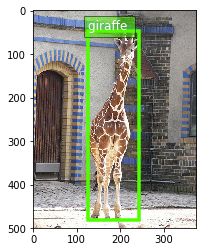

In [37]:
train_image, train_label = train_dataset[11]
bounding_boxes = train_label[:, :4]
class_ids = train_label[:, 4:5]
print(train_label.shape)
print('Image size (height, width, RGB):', train_image.shape)
print('Num of objects:', bounding_boxes.shape[0])
print('Bounding boxes (num_boxes, x_min, y_min, x_max, y_max):\n',
      bounding_boxes)
print('Class IDs (num_boxes, ):\n', train_dataset.classes[23])

utils.viz.plot_bbox(train_image.asnumpy(), bounding_boxes, scores=None,
                    labels=class_ids, class_names=train_dataset.classes)
plt.show()

In [38]:
print(len(train_dataset))

2546


In [39]:
#OpenCV demo

def imShowCv(image):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  #plt.rcParams['figure.figsize'] = [10, 5]
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  
  
  

(7, 5)
[[465.53 183.3  504.73 340.  ]
 [117.73 260.89 159.78 317.15]
 [232.73 218.14 268.62 271.31]
 [141.02 219.27 185.01 271.76]
 [218.57 270.43 267.52 330.3 ]
 [333.86 227.39 379.83 271.98]
 [621.02 226.03 639.   274.78]]
[[23.]
 [23.]
 [23.]
 [23.]
 [23.]
 [23.]
 [23.]]
<class 'numpy.ndarray'>


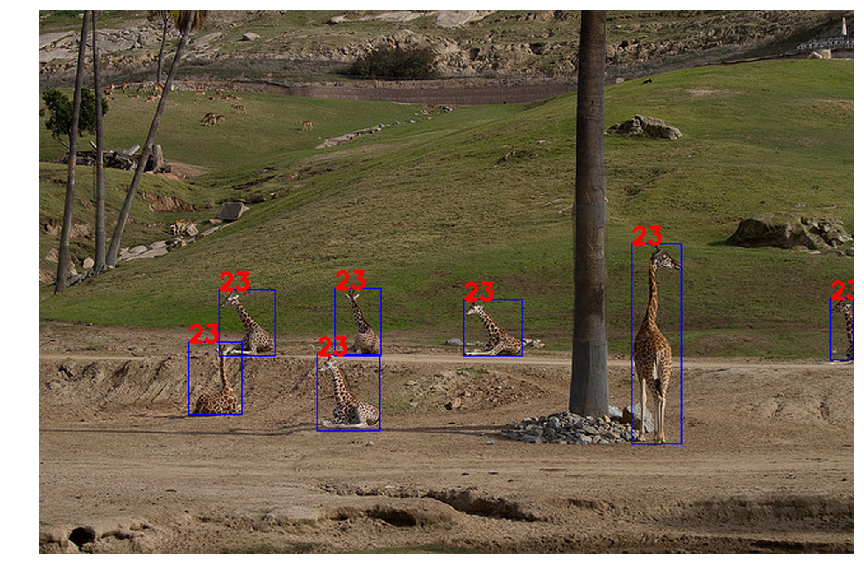

In [40]:
import cv2
import numpy as np


train_image, train_label = train_dataset[2545]
bounding_boxes = train_label[:, :4]
class_ids = train_label[:, 4:5]
print(train_label.shape)



print(bounding_boxes)
print(class_ids)

train_image = train_image.asnumpy()
print(type(train_image))
train_image = cv2.cvtColor(train_image, cv2.COLOR_BGR2RGB)


for i in range(len(class_ids)):
  
  class_id = str(int(class_ids[i][0]))
  bbox = bounding_boxes[i]
  
  x1 = int(bbox[0])
  y1 = int(bbox[1])
  x2 = int(bbox[2])
  y2 = int(bbox[3])
  
  
  cv2.rectangle(train_image, (x1, y1), (x2, y2), (255, 0, 0), 1)
  cv2.putText(train_image,class_id, (x1, y1), cv2.FONT_HERSHEY_SIMPLEX, .6,(0, 0, 255),2)
  
  




imShowCv(train_image)


In [41]:
def yolo_format(class_index, point_1, point_2, width, height):
    # YOLO wants everything normalized
    # Order: class x_center y_center x_width y_height
    x_center = (point_1[0] + point_2[0]) / float(2.0 * width)
    y_center = (point_1[1] + point_2[1]) / float(2.0 * height)
    x_width = float(abs(point_2[0] - point_1[0])) / width
    y_height = float(abs(point_2[1] - point_1[1])) / height
    return str(class_index) + " " + str(x_center) \
       + " " + str(y_center) + " " + str(x_width) + " " + str(y_height)
  
def save_bb(txt_path, line):
    with open(txt_path, 'a') as myfile:
        myfile.write(line + "\n") # append line

In [42]:
!ls

annotations     bbox_txt        images          train2017
annotations_txt bbox_txt2       imagesRE        val2017


In [250]:
!rm -rf images
!rm -rf images_re
!rm -rf bbox_txt
!rm -rf bbox_txt_re
!rm -rf bbox_txt2
!rm -rf bbox_txt2_re

!mkdir images
!mkdir images_re
!mkdir bbox_txt
!mkdir bbox_txt_re
!mkdir bbox_txt2
!mkdir bbox_txt2_re

In [251]:
import cv2
import os

n=0
grid_size = 5
imgFolder = 'images'
imgFolderRe = 'images_re'
txtFolder = 'bbox_txt'
txtFolderRe = 'bbox_txt_re'
txtFolder2 = 'bbox_txt2'
txtFolder2Re = 'bbox_txt2_re'

#id of your class in training of the YOLOv3 model
label_class_id = 0



for i in range(len(train_dataset)):
 
  
  if i % 500 == 0:
    print(i)
    print('images of interest',n)
  
  train_image, train_label = train_dataset[i]
  bounding_boxes = train_label[:, :4]
  class_ids = train_label[:, 4:5]
  
  
  
  if 23 in class_ids:
    
    name = 'giraffe_'+str(n)
    txtPath = os.path.join(txtFolder, name)+'.txt'
    txtPathRe = os.path.join(txtFolderRe, name)+'.txt'
    txtPath2 = os.path.join(txtFolder2, name)+'.txt'
    txtPath2Re = os.path.join(txtFolder2Re, name)+'.txt'
    imgPath = os.path.join(imgFolder, name) +'.jpg'
    imgPathRe = os.path.join(imgFolderRe, name) +'.jpg'
    
    #print(txtPath, imgPath, txtPath2)
    
    
    
    
    #utils.viz.plot_bbox(train_image.asnumpy(), bounding_boxes, scores=None,
                    #labels=class_ids, class_names=train_dataset.classes)
    
    
    image = train_image.asnumpy()
    height, width = image.shape[:2]
    image_size_re = 450
    
    #print(bounding_boxes)
    #print(class_ids)
    
    
    for j in range(len(class_ids)):
      
      if class_ids[j]==23:
        
        bx0 = bounding_boxes[j][0]
        bx1 = bounding_boxes[j][1]
        bx2 = bounding_boxes[j][2]
        bx3 = bounding_boxes[j][3]
        x1 = int(bx0)
        y1 = int(bx1)
        x2 = int(bx2)
        y2 = int(bx3)
        
        bx0_re = bx0*(image_size_re/width)
        bx1_re = bx1*(image_size_re/height)
        bx2_re = bx2*(image_size_re/width)
        bx3_re = bx3*(image_size_re/height)
        

        line = yolo_format(label_class_id,(x1,y1),(x2,y2),width, height)
        save_bb(txtPath, line)
        line_re = yolo_format(label_class_id,(int(bx0_re),int(bx1_re)),(int(bx2_re),int(bx3_re)),image_size_re, image_size_re)
        save_bb(txtPathRe, line_re)
        
        line2 = str(str(bx0)+' '+str(bx1)+' '+str(bx2)+' '+str(bx3))
        save_bb(txtPath2, line2)
        
        line2_re = str(str(bx0_re)+' '+str(bx1_re)+' '+str(bx2_re)+' '+str(bx3_re))
        save_bb(txtPath2Re, line2_re)
        
    n+=1
    
        
        #cv2.rectangle(image, (int(x1), int(y1)), (int(x2), int(y2)), (255,0,0), 2)
    
    
    imageOr = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    cv2.imwrite(imgPath,imageOr)
    image_re = cv2.resize(imageOr,(image_size_re,image_size_re))
    cv2.imwrite(imgPathRe,image_re)
    
    #if (n == 3):
     #   break
    
    #plt.show()
      
print(n)

0
images of interest 0
500
images of interest 500
1000
images of interest 1000
1500
images of interest 1500
2000
images of interest 2000
2500
images of interest 2500
2546


In [143]:
line_re1 = line_re.split(' ')
line_re1[4]

'0.43777777777777777'

In [126]:
int(tst)

1

In [155]:
target_index

13

'0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0.76  0.57  0.25333333333333335  0.43777777777777777  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0'

In [77]:
image.shape

(640, 428, 3)

In [78]:
height, width

(640, 428)

In [131]:
txtPath2

NameError: name 'txtPath2' is not defined

In [61]:
!zip -r selected_giraffe_23.zip bbox_txt images

  adding: bbox_txt/ (stored 0%)
  adding: bbox_txt/giraffe_1661.txt (deflated 50%)
  adding: bbox_txt/giraffe_1063.txt (deflated 65%)
  adding: bbox_txt/giraffe_1387.txt (deflated 72%)
  adding: bbox_txt/giraffe_1108.txt (deflated 57%)
  adding: bbox_txt/giraffe_1215.txt (deflated 69%)
  adding: bbox_txt/giraffe_908.txt (deflated 75%)
  adding: bbox_txt/giraffe_365.txt (deflated 81%)
  adding: bbox_txt/giraffe_2350.txt (deflated 67%)
  adding: bbox_txt/giraffe_1692.txt (deflated 70%)
  adding: bbox_txt/giraffe_2117.txt (deflated 53%)
  adding: bbox_txt/giraffe_151.txt (deflated 77%)
  adding: bbox_txt/giraffe_1723.txt (deflated 67%)
  adding: bbox_txt/giraffe_585.txt (deflated 63%)
  adding: bbox_txt/giraffe_504.txt (deflated 56%)
  adding: bbox_txt/giraffe_1786.txt (deflated 78%)
  adding: bbox_txt/giraffe_2050.txt (deflated 61%)
  adding: bbox_txt/giraffe_136.txt (deflated 66%)
  adding: bbox_txt/giraffe_1261.txt (deflated 56%)
  adding: bbox_txt/giraffe_197.txt (deflated 75%)
  addi

In [63]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [64]:
print(len(os.listdir('images')))
print(len(os.listdir('bbox_txt')))

2546
2546


In [32]:
!pip install json

ERROR: Could not find a version that satisfies the requirement json (from versions: none)
ERROR: No matching distribution found for json


In [0]:
import pandas as pd
import json

In [0]:
with open('annotations/instances_train2017.json') as json_file:
    data = json.load(json_file)

In [36]:
data.keys()

dict_keys(['info', 'licenses', 'images', 'annotations', 'categories'])

In [35]:
for idxcat, valcat in enumerate(data['categories']):
    valcatid = valcat['id']
    counter = 0
    for idxatn, valatn in enumerate(data['annotations']):
        if(valatn['category_id'] == valcatid):
            counter = counter +1
        #print(idx, val['category_id'])
    print(idxcat+1,valcatid,counter,valcat['name']) # cat_count, cat_id, no.of.images, cat_name

1 1 262465 person
2 2 7113 bicycle
3 3 43867 car
4 4 8725 motorcycle
5 5 5135 airplane
6 6 6069 bus
7 7 4571 train
8 8 9973 truck
9 9 10759 boat
10 10 12884 traffic light
11 11 1865 fire hydrant
12 13 1983 stop sign
13 14 1285 parking meter
14 15 9838 bench
15 16 10806 bird
16 17 4768 cat
17 18 5508 dog
18 19 6587 horse
19 20 9509 sheep
20 21 8147 cow
21 22 5513 elephant
22 23 1294 bear
23 24 5303 zebra
24 25 5131 giraffe
25 27 8720 backpack
26 28 11431 umbrella
27 31 12354 handbag
28 32 6496 tie
29 33 6192 suitcase
30 34 2682 frisbee
31 35 6646 skis
32 36 2685 snowboard
33 37 6347 sports ball
34 38 9076 kite
35 39 3276 baseball bat
36 40 3747 baseball glove
37 41 5543 skateboard
38 42 6126 surfboard
39 43 4812 tennis racket
40 44 24342 bottle
41 46 7913 wine glass
42 47 20650 cup
43 48 5479 fork
44 49 7770 knife
45 50 6165 spoon
46 51 14358 bowl
47 52 9458 banana
48 53 5851 apple
49 54 4373 sandwich
50 55 6399 orange
51 56 7308 broccoli
52 57 7852 carrot
53 58 2918 hot dog
54 59 5821 

In [37]:
#64 155 292 sea selected for this Project

annotations_selected = []
listOfSelectedImages = []
counter = 0

for idx, val in enumerate(data['annotations']):
    if(val['category_id'] == 25):
        annotations_selected.append(data['annotations'][idx])
        listOfSelectedImages.append(data['annotations'][idx]['image_id'])
        counter = counter +1
        #print(idx, data['annotations'][idx]['image_id'])
print(counter)




5131


In [38]:
images_selected = []
counter = 0
for idx, val in enumerate(data['images']):
    
    '''    
        check if element exist in list using 'in'
    '''
    if val['id'] in listOfSelectedImages :
        images_selected.append(val)
        counter = counter +1
        #print(idx, data['annotations'][idx]['image_id'])
print(counter)

2546


In [0]:
data['images'] = images_selected
data['annotations'] = annotations_selected

In [0]:
with open('annotations/selected_instances_train2017.json', 'w') as outfile:
    json.dump(data, outfile)

In [0]:
!rm -f selected_instances_train2017.json

In [65]:
file_name = 'giraffe_1003.'
points = 'bbox_txt/'file_name+'txt'

SyntaxError: ignored

In [66]:
points

NameError: ignored

In [62]:
file_name = 'giraffe_1.'
temp = !cat bbox_txt/$file_name'txt'

temp = np.loadtxt('bbox_txt/'+file_name+'txt')

array([[0.        , 0.6557377 , 0.590625  , 0.67447307, 0.778125  ],
       [0.        , 0.38875878, 0.55546875, 0.54332553, 0.8859375 ]])

In [50]:
import cv2
im = cv2.imread('images/'+file_name+'jpg')
type(im)

numpy.ndarray

In [92]:
fi = !cat annotations_txt/val2017/000000000025.txt
print(fi)
type(fi)

['[53.01, 356.49, 132.03, 55.19]']


IPython.utils.text.SList

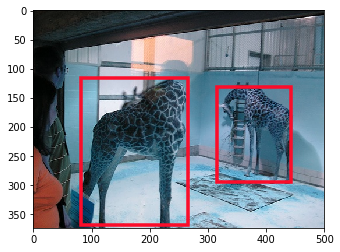

In [111]:
file_name = 'giraffe_2.'
temp = np.loadtxt('bbox_txt2/'+file_name+'txt')

im = cv2.imread('images/'+file_name+'jpg')
utils.viz.plot_bbox(im, temp, scores=None,)
plt.show()

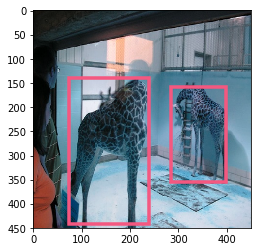

In [112]:

temp = np.loadtxt('bbox_txt2_re/'+file_name+'txt')

im = cv2.imread('images_re/'+file_name+'jpg')
utils.viz.plot_bbox(im, temp, scores=None,)
plt.show()

In [161]:
bounding_boxes

array([[385.53,  60.03, 599.5 , 356.19],
       [ 53.01, 356.49, 184.04, 410.68]])

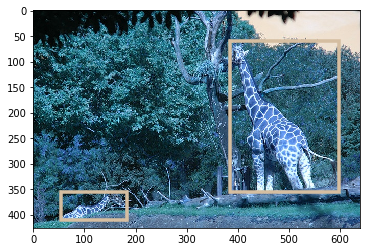

In [163]:
utils.viz.plot_bbox(im, temp, scores=None,)
plt.show()

In [61]:
type(bounding_boxes)

numpy.ndarray

(1, 5)
Image size (height, width, RGB): (640, 480, 3)
Num of objects: 1
Bounding boxes (num_boxes, x_min, y_min, x_max, y_max):
 [[129.44 115.06 325.47 571.4 ]]
Class IDs (num_boxes, ):
 giraffe


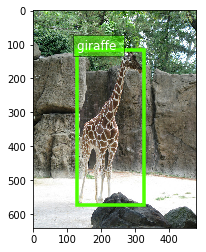

In [173]:
train_image, train_label = train_dataset[907]
bounding_boxes = train_label[:, :4]
class_ids = train_label[:, 4:5]
print(train_label.shape)
print('Image size (height, width, RGB):', train_image.shape)
print('Num of objects:', bounding_boxes.shape[0])
print('Bounding boxes (num_boxes, x_min, y_min, x_max, y_max):\n',
      bounding_boxes)
print('Class IDs (num_boxes, ):\n', train_dataset.classes[23])

utils.viz.plot_bbox(train_image.asnumpy(), bounding_boxes, scores=None,
                    labels=class_ids, class_names=train_dataset.classes)
plt.show()

In [179]:
type(bounding_boxes[0])

numpy.ndarray

In [175]:
temp

array([129.44, 115.06, 325.47, 571.4 ])

In [180]:
type(temp)

numpy.ndarray

In [185]:
temp1 = temp

In [186]:
temp1

array([129.44, 115.06, 325.47, 571.4 ])

In [1]:
import cv2

In [ ]:
import cv2
filename = 'your_image.jpg'
W = 1000.
oriimg = cv2.imread(filename,cv2.CV_LOAD_IMAGE_COLOR)
height, width, depth = oriimg.shape
imgScale = W/width
newX,newY = oriimg.shape[1]*imgScale, oriimg.shape[0]*imgScale
newimg = cv2.resize(oriimg,(int(newX),int(newY)))
cv2.imshow("Show by CV2",newimg)
cv2.waitKey(0)
cv2.imwrite("resizeimg.jpg",newimg)

In [8]:
!pwd

/Users/saeedahmadgill/Desktop/FAST NU/sem 3/DeepLearning/project_dnn/new


In [23]:
filename = 'giraffe_6.jpg'

oriimg = cv2.imread('images/'+filename,cv2.COLOR_BGR2RGB)
image=cv2.imread(filename)

img_size = 416
newimg = cv2.resize(oriimg,(img_size,img_size))
cv2.imshow("Show by CV2",newimg)

cv2.imwrite('imagesRE/'+filename,newimg)


True

In [17]:
import numpy as np

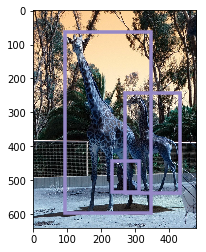

In [29]:
file_name = '0giraffe_6.'
temp = np.loadtxt('imagesRE/'+file_name+'txt')

im = cv2.imread('imagesRE/'+file_name+'jpg')
utils.viz.plot_bbox(im, temp, scores=None,)
plt.show()

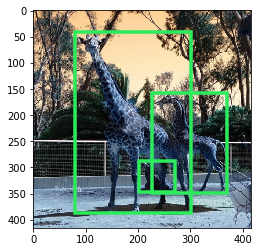

In [32]:
file_name = 'giraffe_6.'
temp = np.loadtxt('imagesRE/'+file_name+'txt')

im = cv2.imread('imagesRE/'+file_name+'jpg')
utils.viz.plot_bbox(im, temp, scores=None,)
plt.show()

In [195]:
import glob
!ls bbox_txt

giraffe_0.txt giraffe_1.txt giraffe_2.txt


In [202]:
path_of_all_yolo_files = glob.glob('bbox_txt/giraffe_*.txt')

In [214]:
filepath = 'bbox_txt/giraffe_2.txt'
with open(filepath) as fp:
   lines = fp.readline()
for line in lines:
    print(line)

0
 
0
.
3
4
8
 
0
.
6
4
7
0
5
8
8
2
3
5
2
9
4
1
1
8
 
0
.
3
6
8
 
0
.
6
7
3
7
9
6
7
9
1
4
4
3
8
5
0
3




In [203]:
!cat $path_of_all_yolo_files[0]

cat: [bbox_txt/giraffe_0.txt,: No such file or directory
cat: bbox_txt/giraffe_1.txt,: No such file or directory
cat: bbox_txt/giraffe_2.txt][0]: No such file or directory


In [215]:
temp = np.loadtxt('bbox_txt/'+file_name+'txt')

In [224]:
temp.shape[0]

(4, 5)

In [314]:
path_of_all_yolo_files = glob.glob('bbox_txt_re/giraffe_*.txt')
for path_of_all_yolo_file in path_of_all_yolo_files:
    print(path_of_all_yolo_file)
    temp = np.loadtxt(path_of_all_yolo_file) 
    if(isinstance(temp[0], np.float64)):
        temp0 = temp.copy()
        temp = np.vstack((temp , temp0))
    target = [0] * 125
    for i in range (temp.shape[0]):
    
        yolo_target = temp[i]
        yolo_x = float(yolo_target[1])
        yolo_y = float(yolo_target[2])
        yolo_w = float(yolo_target[3])
        yolo_h = float(yolo_target[4])



        target_index =    ( ((int(yolo_y*grid_size))*grid_size )+  (int(yolo_x*grid_size)))*grid_size

        target[target_index] = 1
        target[target_index+1] = yolo_x
        target[target_index+2] = yolo_y
        target[target_index+3] = yolo_w
        target[target_index+4] = yolo_h
        
    target = str(target)
    target = target.replace(',',' ')[1:-1]
    path = 'target_'+path_of_all_yolo_file[:8]+path_of_all_yolo_file[11:]
    text_file = open(path, "w")
    text_file.write(target)
    text_file.close()
print('Everything is Right ')
        
    

bbox_txt_re/giraffe_0.txt
bbox_txt_re/giraffe_1.txt
bbox_txt_re/giraffe_10.txt
bbox_txt_re/giraffe_100.txt
bbox_txt_re/giraffe_1000.txt
bbox_txt_re/giraffe_1001.txt
bbox_txt_re/giraffe_1002.txt
bbox_txt_re/giraffe_1003.txt
bbox_txt_re/giraffe_1004.txt
bbox_txt_re/giraffe_1005.txt
bbox_txt_re/giraffe_1006.txt
bbox_txt_re/giraffe_1007.txt
bbox_txt_re/giraffe_1008.txt
bbox_txt_re/giraffe_1009.txt
bbox_txt_re/giraffe_101.txt
bbox_txt_re/giraffe_1010.txt
bbox_txt_re/giraffe_1011.txt
bbox_txt_re/giraffe_1012.txt
bbox_txt_re/giraffe_1013.txt
bbox_txt_re/giraffe_1014.txt
bbox_txt_re/giraffe_1015.txt
bbox_txt_re/giraffe_1016.txt
bbox_txt_re/giraffe_1017.txt
bbox_txt_re/giraffe_1018.txt
bbox_txt_re/giraffe_1019.txt
bbox_txt_re/giraffe_102.txt
bbox_txt_re/giraffe_1020.txt
bbox_txt_re/giraffe_1021.txt
bbox_txt_re/giraffe_1022.txt
bbox_txt_re/giraffe_1023.txt
bbox_txt_re/giraffe_1024.txt
bbox_txt_re/giraffe_1025.txt
bbox_txt_re/giraffe_1026.txt
bbox_txt_re/giraffe_1027.txt
bbox_txt_re/giraffe_1028.

bbox_txt_re/giraffe_1264.txt
bbox_txt_re/giraffe_1265.txt
bbox_txt_re/giraffe_1266.txt
bbox_txt_re/giraffe_1267.txt
bbox_txt_re/giraffe_1268.txt
bbox_txt_re/giraffe_1269.txt
bbox_txt_re/giraffe_127.txt
bbox_txt_re/giraffe_1270.txt
bbox_txt_re/giraffe_1271.txt
bbox_txt_re/giraffe_1272.txt
bbox_txt_re/giraffe_1273.txt
bbox_txt_re/giraffe_1274.txt
bbox_txt_re/giraffe_1275.txt
bbox_txt_re/giraffe_1276.txt
bbox_txt_re/giraffe_1277.txt
bbox_txt_re/giraffe_1278.txt
bbox_txt_re/giraffe_1279.txt
bbox_txt_re/giraffe_128.txt
bbox_txt_re/giraffe_1280.txt
bbox_txt_re/giraffe_1281.txt
bbox_txt_re/giraffe_1282.txt
bbox_txt_re/giraffe_1283.txt
bbox_txt_re/giraffe_1284.txt
bbox_txt_re/giraffe_1285.txt
bbox_txt_re/giraffe_1286.txt
bbox_txt_re/giraffe_1287.txt
bbox_txt_re/giraffe_1288.txt
bbox_txt_re/giraffe_1289.txt
bbox_txt_re/giraffe_129.txt
bbox_txt_re/giraffe_1290.txt
bbox_txt_re/giraffe_1291.txt
bbox_txt_re/giraffe_1292.txt
bbox_txt_re/giraffe_1293.txt
bbox_txt_re/giraffe_1294.txt
bbox_txt_re/giraf

bbox_txt_re/giraffe_153.txt
bbox_txt_re/giraffe_1530.txt
bbox_txt_re/giraffe_1531.txt
bbox_txt_re/giraffe_1532.txt
bbox_txt_re/giraffe_1533.txt
bbox_txt_re/giraffe_1534.txt
bbox_txt_re/giraffe_1535.txt
bbox_txt_re/giraffe_1536.txt
bbox_txt_re/giraffe_1537.txt
bbox_txt_re/giraffe_1538.txt
bbox_txt_re/giraffe_1539.txt
bbox_txt_re/giraffe_154.txt
bbox_txt_re/giraffe_1540.txt
bbox_txt_re/giraffe_1541.txt
bbox_txt_re/giraffe_1542.txt
bbox_txt_re/giraffe_1543.txt
bbox_txt_re/giraffe_1544.txt
bbox_txt_re/giraffe_1545.txt
bbox_txt_re/giraffe_1546.txt
bbox_txt_re/giraffe_1547.txt
bbox_txt_re/giraffe_1548.txt
bbox_txt_re/giraffe_1549.txt
bbox_txt_re/giraffe_155.txt
bbox_txt_re/giraffe_1550.txt
bbox_txt_re/giraffe_1551.txt
bbox_txt_re/giraffe_1552.txt
bbox_txt_re/giraffe_1553.txt
bbox_txt_re/giraffe_1554.txt
bbox_txt_re/giraffe_1555.txt
bbox_txt_re/giraffe_1556.txt
bbox_txt_re/giraffe_1557.txt
bbox_txt_re/giraffe_1558.txt
bbox_txt_re/giraffe_1559.txt
bbox_txt_re/giraffe_156.txt
bbox_txt_re/giraff

bbox_txt_re/giraffe_180.txt
bbox_txt_re/giraffe_1800.txt
bbox_txt_re/giraffe_1801.txt
bbox_txt_re/giraffe_1802.txt
bbox_txt_re/giraffe_1803.txt
bbox_txt_re/giraffe_1804.txt
bbox_txt_re/giraffe_1805.txt
bbox_txt_re/giraffe_1806.txt
bbox_txt_re/giraffe_1807.txt
bbox_txt_re/giraffe_1808.txt
bbox_txt_re/giraffe_1809.txt
bbox_txt_re/giraffe_181.txt
bbox_txt_re/giraffe_1810.txt
bbox_txt_re/giraffe_1811.txt
bbox_txt_re/giraffe_1812.txt
bbox_txt_re/giraffe_1813.txt
bbox_txt_re/giraffe_1814.txt
bbox_txt_re/giraffe_1815.txt
bbox_txt_re/giraffe_1816.txt
bbox_txt_re/giraffe_1817.txt
bbox_txt_re/giraffe_1818.txt
bbox_txt_re/giraffe_1819.txt
bbox_txt_re/giraffe_182.txt
bbox_txt_re/giraffe_1820.txt
bbox_txt_re/giraffe_1821.txt
bbox_txt_re/giraffe_1822.txt
bbox_txt_re/giraffe_1823.txt
bbox_txt_re/giraffe_1824.txt
bbox_txt_re/giraffe_1825.txt
bbox_txt_re/giraffe_1826.txt
bbox_txt_re/giraffe_1827.txt
bbox_txt_re/giraffe_1828.txt
bbox_txt_re/giraffe_1829.txt
bbox_txt_re/giraffe_183.txt
bbox_txt_re/giraff

bbox_txt_re/giraffe_2078.txt
bbox_txt_re/giraffe_2079.txt
bbox_txt_re/giraffe_208.txt
bbox_txt_re/giraffe_2080.txt
bbox_txt_re/giraffe_2081.txt
bbox_txt_re/giraffe_2082.txt
bbox_txt_re/giraffe_2083.txt
bbox_txt_re/giraffe_2084.txt
bbox_txt_re/giraffe_2085.txt
bbox_txt_re/giraffe_2086.txt
bbox_txt_re/giraffe_2087.txt
bbox_txt_re/giraffe_2088.txt
bbox_txt_re/giraffe_2089.txt
bbox_txt_re/giraffe_209.txt
bbox_txt_re/giraffe_2090.txt
bbox_txt_re/giraffe_2091.txt
bbox_txt_re/giraffe_2092.txt
bbox_txt_re/giraffe_2093.txt
bbox_txt_re/giraffe_2094.txt
bbox_txt_re/giraffe_2095.txt
bbox_txt_re/giraffe_2096.txt
bbox_txt_re/giraffe_2097.txt
bbox_txt_re/giraffe_2098.txt
bbox_txt_re/giraffe_2099.txt
bbox_txt_re/giraffe_21.txt
bbox_txt_re/giraffe_210.txt
bbox_txt_re/giraffe_2100.txt
bbox_txt_re/giraffe_2101.txt
bbox_txt_re/giraffe_2102.txt
bbox_txt_re/giraffe_2103.txt
bbox_txt_re/giraffe_2104.txt
bbox_txt_re/giraffe_2105.txt
bbox_txt_re/giraffe_2106.txt
bbox_txt_re/giraffe_2107.txt
bbox_txt_re/giraffe

bbox_txt_re/giraffe_2348.txt
bbox_txt_re/giraffe_2349.txt
bbox_txt_re/giraffe_235.txt
bbox_txt_re/giraffe_2350.txt
bbox_txt_re/giraffe_2351.txt
bbox_txt_re/giraffe_2352.txt
bbox_txt_re/giraffe_2353.txt
bbox_txt_re/giraffe_2354.txt
bbox_txt_re/giraffe_2355.txt
bbox_txt_re/giraffe_2356.txt
bbox_txt_re/giraffe_2357.txt
bbox_txt_re/giraffe_2358.txt
bbox_txt_re/giraffe_2359.txt
bbox_txt_re/giraffe_236.txt
bbox_txt_re/giraffe_2360.txt
bbox_txt_re/giraffe_2361.txt
bbox_txt_re/giraffe_2362.txt
bbox_txt_re/giraffe_2363.txt
bbox_txt_re/giraffe_2364.txt
bbox_txt_re/giraffe_2365.txt
bbox_txt_re/giraffe_2366.txt
bbox_txt_re/giraffe_2367.txt
bbox_txt_re/giraffe_2368.txt
bbox_txt_re/giraffe_2369.txt
bbox_txt_re/giraffe_237.txt
bbox_txt_re/giraffe_2370.txt
bbox_txt_re/giraffe_2371.txt
bbox_txt_re/giraffe_2372.txt
bbox_txt_re/giraffe_2373.txt
bbox_txt_re/giraffe_2374.txt
bbox_txt_re/giraffe_2375.txt
bbox_txt_re/giraffe_2376.txt
bbox_txt_re/giraffe_2377.txt
bbox_txt_re/giraffe_2378.txt
bbox_txt_re/giraf

bbox_txt_re/giraffe_322.txt
bbox_txt_re/giraffe_323.txt
bbox_txt_re/giraffe_324.txt
bbox_txt_re/giraffe_325.txt
bbox_txt_re/giraffe_326.txt
bbox_txt_re/giraffe_327.txt
bbox_txt_re/giraffe_328.txt
bbox_txt_re/giraffe_329.txt
bbox_txt_re/giraffe_33.txt
bbox_txt_re/giraffe_330.txt
bbox_txt_re/giraffe_331.txt
bbox_txt_re/giraffe_332.txt
bbox_txt_re/giraffe_333.txt
bbox_txt_re/giraffe_334.txt
bbox_txt_re/giraffe_335.txt
bbox_txt_re/giraffe_336.txt
bbox_txt_re/giraffe_337.txt
bbox_txt_re/giraffe_338.txt
bbox_txt_re/giraffe_339.txt
bbox_txt_re/giraffe_34.txt
bbox_txt_re/giraffe_340.txt
bbox_txt_re/giraffe_341.txt
bbox_txt_re/giraffe_342.txt
bbox_txt_re/giraffe_343.txt
bbox_txt_re/giraffe_344.txt
bbox_txt_re/giraffe_345.txt
bbox_txt_re/giraffe_346.txt
bbox_txt_re/giraffe_347.txt
bbox_txt_re/giraffe_348.txt
bbox_txt_re/giraffe_349.txt
bbox_txt_re/giraffe_35.txt
bbox_txt_re/giraffe_350.txt
bbox_txt_re/giraffe_351.txt
bbox_txt_re/giraffe_352.txt
bbox_txt_re/giraffe_353.txt
bbox_txt_re/giraffe_354

bbox_txt_re/giraffe_590.txt
bbox_txt_re/giraffe_591.txt
bbox_txt_re/giraffe_592.txt
bbox_txt_re/giraffe_593.txt
bbox_txt_re/giraffe_594.txt
bbox_txt_re/giraffe_595.txt
bbox_txt_re/giraffe_596.txt
bbox_txt_re/giraffe_597.txt
bbox_txt_re/giraffe_598.txt
bbox_txt_re/giraffe_599.txt
bbox_txt_re/giraffe_6.txt
bbox_txt_re/giraffe_60.txt
bbox_txt_re/giraffe_600.txt
bbox_txt_re/giraffe_601.txt
bbox_txt_re/giraffe_602.txt
bbox_txt_re/giraffe_603.txt
bbox_txt_re/giraffe_604.txt
bbox_txt_re/giraffe_605.txt
bbox_txt_re/giraffe_606.txt
bbox_txt_re/giraffe_607.txt
bbox_txt_re/giraffe_608.txt
bbox_txt_re/giraffe_609.txt
bbox_txt_re/giraffe_61.txt
bbox_txt_re/giraffe_610.txt
bbox_txt_re/giraffe_611.txt
bbox_txt_re/giraffe_612.txt
bbox_txt_re/giraffe_613.txt
bbox_txt_re/giraffe_614.txt
bbox_txt_re/giraffe_615.txt
bbox_txt_re/giraffe_616.txt
bbox_txt_re/giraffe_617.txt
bbox_txt_re/giraffe_618.txt
bbox_txt_re/giraffe_619.txt
bbox_txt_re/giraffe_62.txt
bbox_txt_re/giraffe_620.txt
bbox_txt_re/giraffe_621.t

bbox_txt_re/giraffe_88.txt
bbox_txt_re/giraffe_880.txt
bbox_txt_re/giraffe_881.txt
bbox_txt_re/giraffe_882.txt
bbox_txt_re/giraffe_883.txt
bbox_txt_re/giraffe_884.txt
bbox_txt_re/giraffe_885.txt
bbox_txt_re/giraffe_886.txt
bbox_txt_re/giraffe_887.txt
bbox_txt_re/giraffe_888.txt
bbox_txt_re/giraffe_889.txt
bbox_txt_re/giraffe_89.txt
bbox_txt_re/giraffe_890.txt
bbox_txt_re/giraffe_891.txt
bbox_txt_re/giraffe_892.txt
bbox_txt_re/giraffe_893.txt
bbox_txt_re/giraffe_894.txt
bbox_txt_re/giraffe_895.txt
bbox_txt_re/giraffe_896.txt
bbox_txt_re/giraffe_897.txt
bbox_txt_re/giraffe_898.txt
bbox_txt_re/giraffe_899.txt
bbox_txt_re/giraffe_9.txt
bbox_txt_re/giraffe_90.txt
bbox_txt_re/giraffe_900.txt
bbox_txt_re/giraffe_901.txt
bbox_txt_re/giraffe_902.txt
bbox_txt_re/giraffe_903.txt
bbox_txt_re/giraffe_904.txt
bbox_txt_re/giraffe_905.txt
bbox_txt_re/giraffe_906.txt
bbox_txt_re/giraffe_907.txt
bbox_txt_re/giraffe_908.txt
bbox_txt_re/giraffe_909.txt
bbox_txt_re/giraffe_91.txt
bbox_txt_re/giraffe_910.tx

In [307]:

isinstance(temp[0], np.float64)


True

In [313]:
        temp0 = temp.copy()
        np.concatenate(temp , temp)

TypeError: only integer scalar arrays can be converted to a scalar index

In [259]:
B = temp.reshape((5, 2))

ValueError: cannot reshape array of size 5 into shape (5,2)

In [327]:
import os 
os.chdir('/Volumes/Seagate Expansion Drive/FAST/semester 3/coco/final selected/')
!ls bbox_txt_re

giraffe_0.txt    giraffe_1571.txt giraffe_2144.txt giraffe_427.txt
giraffe_1.txt    giraffe_1572.txt giraffe_2145.txt giraffe_428.txt
giraffe_10.txt   giraffe_1573.txt giraffe_2146.txt giraffe_429.txt
giraffe_100.txt  giraffe_1574.txt giraffe_2147.txt giraffe_43.txt
giraffe_1000.txt giraffe_1575.txt giraffe_2148.txt giraffe_430.txt
giraffe_1001.txt giraffe_1576.txt giraffe_2149.txt giraffe_431.txt
giraffe_1002.txt giraffe_1577.txt giraffe_215.txt  giraffe_432.txt
giraffe_1003.txt giraffe_1578.txt giraffe_2150.txt giraffe_433.txt
giraffe_1004.txt giraffe_1579.txt giraffe_2151.txt giraffe_434.txt
giraffe_1005.txt giraffe_158.txt  giraffe_2152.txt giraffe_435.txt
giraffe_1006.txt giraffe_1580.txt giraffe_2153.txt giraffe_436.txt
giraffe_1007.txt giraffe_1581.txt giraffe_2154.txt giraffe_437.txt
giraffe_1008.txt giraffe_1582.txt giraffe_2155.txt giraffe_438.txt
giraffe_1009.txt giraffe_1583.txt giraffe_2156.txt giraffe_439.txt
giraffe_101.txt  giraffe_1584.txt giraffe_2157.txt giraffe_44.t

In [325]:
!root

/bin/sh: root: command not found


In [362]:
from torch.utils.data import DataLoader
class DataSet:

    def __init__(self, root):
        """Init function should not do any heavy lifting, but
            must initialize how many items are available in this data set.
        """

        self.ROOT = root
        self.images = read_images(root + "/images_re/")
        self.labels = read_labels(root + "/target_bbox_txt")

    def __len__(self):
        """return number of points in our dataset"""

        return len(self.images)

    def __getitem__(self, idx):
        """ Here we have to return the item requested by `idx`
            The PyTorch DataLoader class will use this method to make an iterable for
            our training or validation loop.
        """

        img = images[idx]
        label = labels[idx]

        return img, label

In [356]:
!ls

import torchvision

Archive.zip     bbox_txt        images          train2017
annotations     bbox_txt2       imagesRE        val2017
annotations_txt bbox_txt2_re    input


In [357]:
ds = Dataset('input')

NameError: name 'Dataset' is not defined

In [358]:
 transform = transforms.Compose(
        [transforms.ToTensor()])
train = torchvision.datasets.ImageFolder(root='input', 
 transform=transform)

In [366]:
dl = DataLoader(train, batch_size=90, shuffle=False)

In [367]:
dl

In [368]:
for image, label in dl:
    print(label)
    break

tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])


In [349]:
idx = 'giraffe_0'
DataSet.getitem(idx)

AttributeError: type object 'DataSet' has no attribute 'getitem'

In [344]:
from torchvision import datasets, transforms
import torch

def load_training(root_path, dir, batch_size, kwargs):
    transform = transforms.Compose(
        [transforms.ToTensor()])
    data = datasets.ImageFolder(root=root_path + dir, transform=transform)
    train_loader = torch.utils.data.DataLoader(data, batch_size=batch_size, shuffle=True, drop_last=True, **kwargs)
    return train_loader

In [372]:
from .vision import VisionDataset

from PIL import Image

import os
import os.path
import sys

ModuleNotFoundError: No module named '__main__.vision'; '__main__' is not a package

In [435]:
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import os
import argparse
import torch
from torch.utils.data import Dataset
from tqdm import tqdm
from PIL import Image


class customDataset(Dataset):
    
    def __init__(self, list_file, img_dir, text_dir, transform=None):
        # list of images to load in a .txt file
        self.images = open(list_file, "rt").read().split("\n")[:-1]
        self.transform = transform
        # note that in the .txt file the image names are stored without the extension(.jpg or .txt)
        self.img_extension = ".jpg"
        self.text_extension = ".txt"

        self.image_root_dir = img_dir
        self.text_root_dir = text_dir


    def __len__(self):
        return len(self.images)

    def __getitem__(self, index):
        name = self.images[index]
        image_path = os.path.join(self.image_root_dir, name + self.img_extension)
        text_path = os.path.join(self.text_root_dir, name + self.text_extension)

        image = self.load_image(path=image_path)
        label = self.load_text(path=text_path)
        #data = {
         #           'image': torch.FloatTensor(image),
          #          'label' : torch.LongTensor(label)
           #         }
        return image, label


    def load_image(self, path=None):
        # can use any other library too like OpenCV as long as you are consistent with it
        raw_image = Image.open(path)
        raw_image = np.transpose(raw_image.resize((224, 224)), (2,1,0))
        imx_t = np.array(raw_image, dtype=np.float32)/255.0

        return imx_t
    # can comment the below function if not needed
    def load_text(self, path=None):
        imx_t = np.loadtxt(path)
        #raw_image = Image.open(path)
        #imx_t = np.array(raw_image)
        return imx_t

In [382]:
for i in range(2545):
    print ("giraffe_"+str(i))

In [385]:
!ls input

bbox_txt_re         images_re           name_list_train.txt target_bbox_txt


In [438]:
pwd = '/Volumes/Seagate Expansion Drive/FAST/semester 3/coco/final selected'
list_file = pwd+'/input/name_list_train.txt'
img_dir = pwd+'/input/images_re'
text_dir = pwd+'/input/target_bbox_txt'

for image, label in ds:
    print(label)
    break

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         1.
 0.76888889 0.48777778 0.33333333 0.69555556 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         1.         